# Librerias

In [1]:
%pip install nhanes
%pip install pyjanitor
%pip install missingno
%pip install session_info
%pip install UpSetPlot

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import janitor
import matplotlib.pyplot as plt
import missingno
import nhanes.load
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sb
import session_info
import sklearn.compose
import sklearn.impute
import sklearn.preprocessing
import statsmodels.api as sm
import statsmodels.datasets

from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.kernel_approximation import Nystroem
from sklearn.linear_model import BayesianRidge, Ridge
from sklearn.neighbors import KNeighborsRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.mosaicplot import mosaic
from sklearn import set_config

import warnings
warnings.filterwarnings("ignore")

La imputación de datos se suele hacer por regresión

In [3]:
%run ./explore_tools/pandas-missing-extension.ipynb

# Imputación por series de tiempo

In [4]:
airquality_df = (sm.datasets
                 .get_rdataset("airquality")
                 .data.clean_names(case_type="snake")
                 .add_column('year',1973)
                 .assign(date = lambda df: pd.to_datetime(df[['year','month','day']]))
                 .sort_values(by='date').set_index('date'))
airquality_df
#Cuando se tienen series de tiempo, el id debe ser la fecha siendo esta la variable independiente

,ozone,solar_r,wind,temp,month,day,year
date,,,,,,,
1973-05-01,41.0,190.0,7.4,67,5,1,1973
1973-05-02,36.0,118.0,8.0,72,5,2,1973
1973-05-03,12.0,149.0,12.6,74,5,3,1973
1973-05-04,18.0,313.0,11.5,62,5,4,1973
1973-05-05,NaN,NaN,14.3,56,5,5,1973
...,...,...,...,...,...,...,...
1973-09-26,30.0,193.0,6.9,70,9,26,1973
1973-09-27,NaN,145.0,13.2,77,9,27,1973
1973-09-28,14.0,191.0,14.3,75,9,28,1973


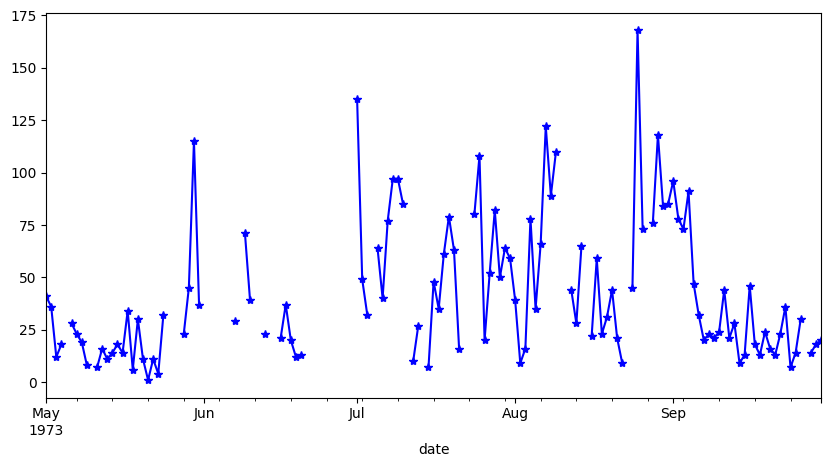

In [5]:
plt.figure(figsize=(10,5))
airquality_df['ozone'].plot(marker='*', linestyle='-', color='b')
plt.show()

Imputación por llenado hacia atras

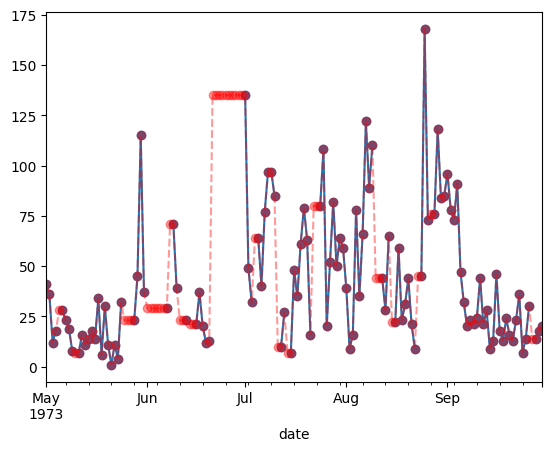

In [6]:
plt.plot(figsize=(20,20))
airquality_df.ozone.plot(marker = "o")
airquality_df.ozone.bfill().plot(color="r", alpha=0.4, ls="dashed", marker = "o")
plt.show()

Imputación llenado hacia adelante (se usa habitualmente, vease caso bolsa de valores)

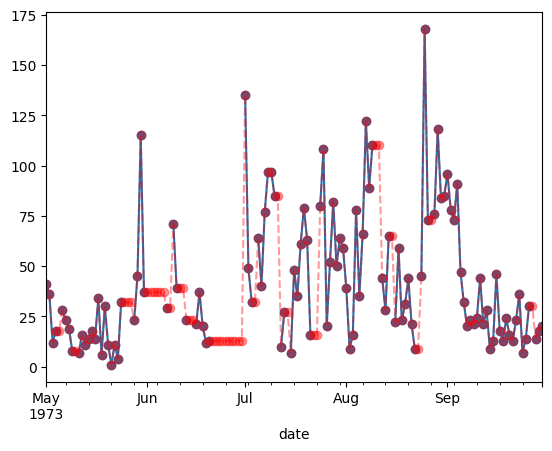

In [7]:
plt.plot(figsize=(20,20))
airquality_df.ozone.plot(marker = "o")
airquality_df.ozone.ffill().plot(color="r", alpha=0.4, ls="dashed", marker = "o")
plt.show()

Imputación por interpolación
Tiene varios metodos

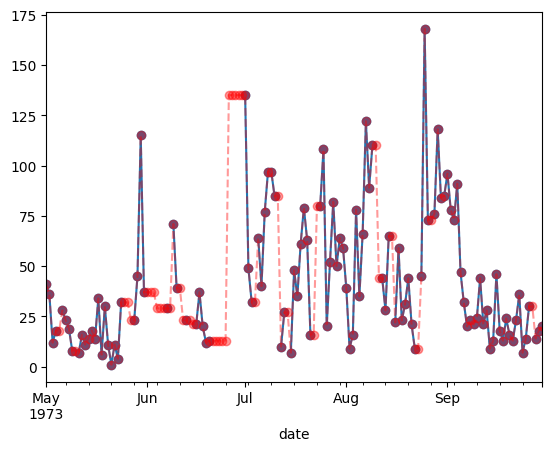

In [8]:
#Nearest
plt.plot(figsize=(20,20))
airquality_df.ozone.plot(marker = "o")
airquality_df.ozone.interpolate(method='nearest').plot(color="r", alpha=0.4, ls="dashed", marker = "o")
plt.show()

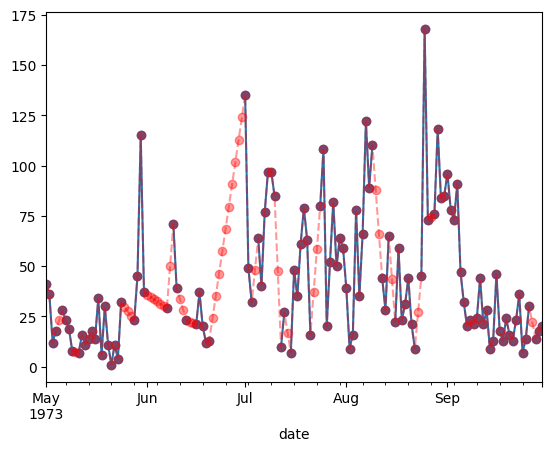

In [9]:
#Lineal
plt.plot(figsize=(20,20))
airquality_df.ozone.plot(marker = "o")
airquality_df.ozone.interpolate(method='linear').plot(color="r", alpha=0.4, ls="dashed", marker = "o")
plt.show()

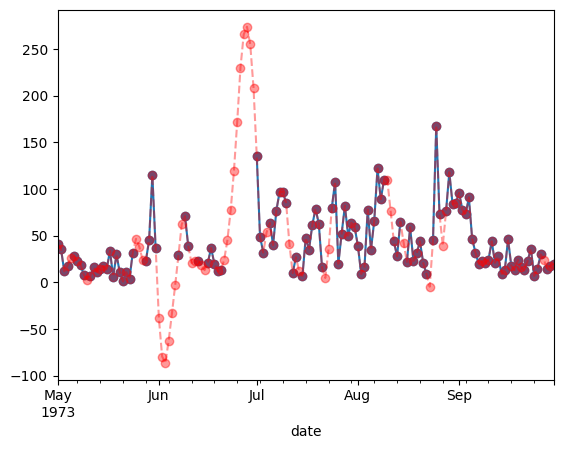

In [10]:
#Quadratic  (be carefil with this one, it can produce a lot of noise with the data, in this case negative ozone values)
plt.plot(figsize=(20,20))
airquality_df.ozone.plot(marker = "o")
airquality_df.ozone.interpolate(method='quadratic').plot(color="r", alpha=0.4, ls="dashed", marker = "o")
plt.show()

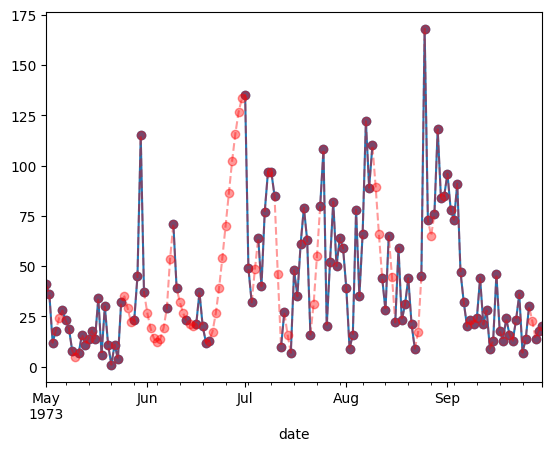

In [11]:
#Akima
plt.plot(figsize=(20,20))
airquality_df.ozone.plot(marker = "o")
airquality_df.ozone.interpolate(method='akima').plot(color="r", alpha=0.4, ls="dashed", marker = "o")
plt.show()

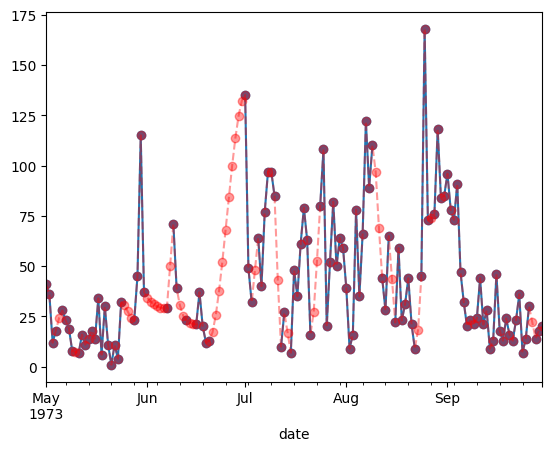

In [12]:
#pchip (Piecewise Cubic Hermite Interpolating Polynomial) Castiga tendendencias negativas
plt.plot(figsize=(20,20))
airquality_df.ozone.plot(marker = "o")
airquality_df.ozone.interpolate(method='pchip').plot(color="r", alpha=0.4, ls="dashed", marker = "o")
plt.show()

In [13]:
airquality_df.ozone = airquality_df.ozone.interpolate(method='akima')
airquality_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 153 entries, 1973-05-01 to 1973-09-30
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ozone    153 non-null    float64
 1   solar_r  146 non-null    float64
 2   wind     153 non-null    float64
 3   temp     153 non-null    int64  
 4   month    153 non-null    int64  
 5   day      153 non-null    int64  
 6   year     153 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 9.6 KB


### Para solar_r

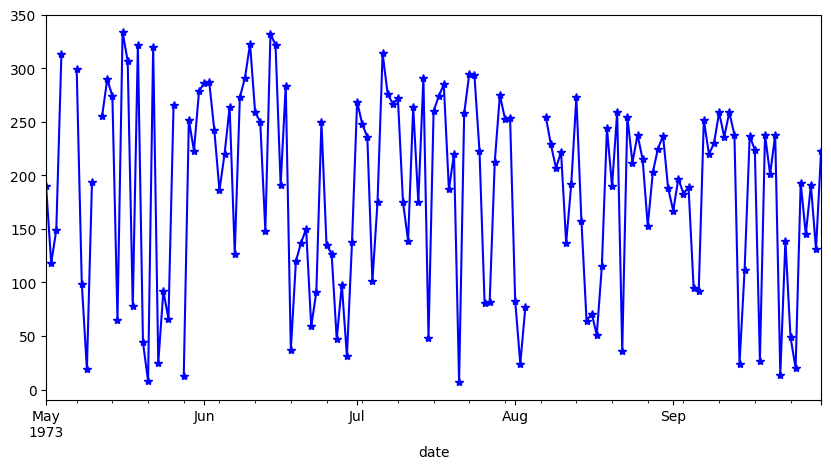

In [14]:
plt.figure(figsize=(10,5))
airquality_df['solar_r'].plot(marker='*', linestyle='-', color='b')
plt.show()

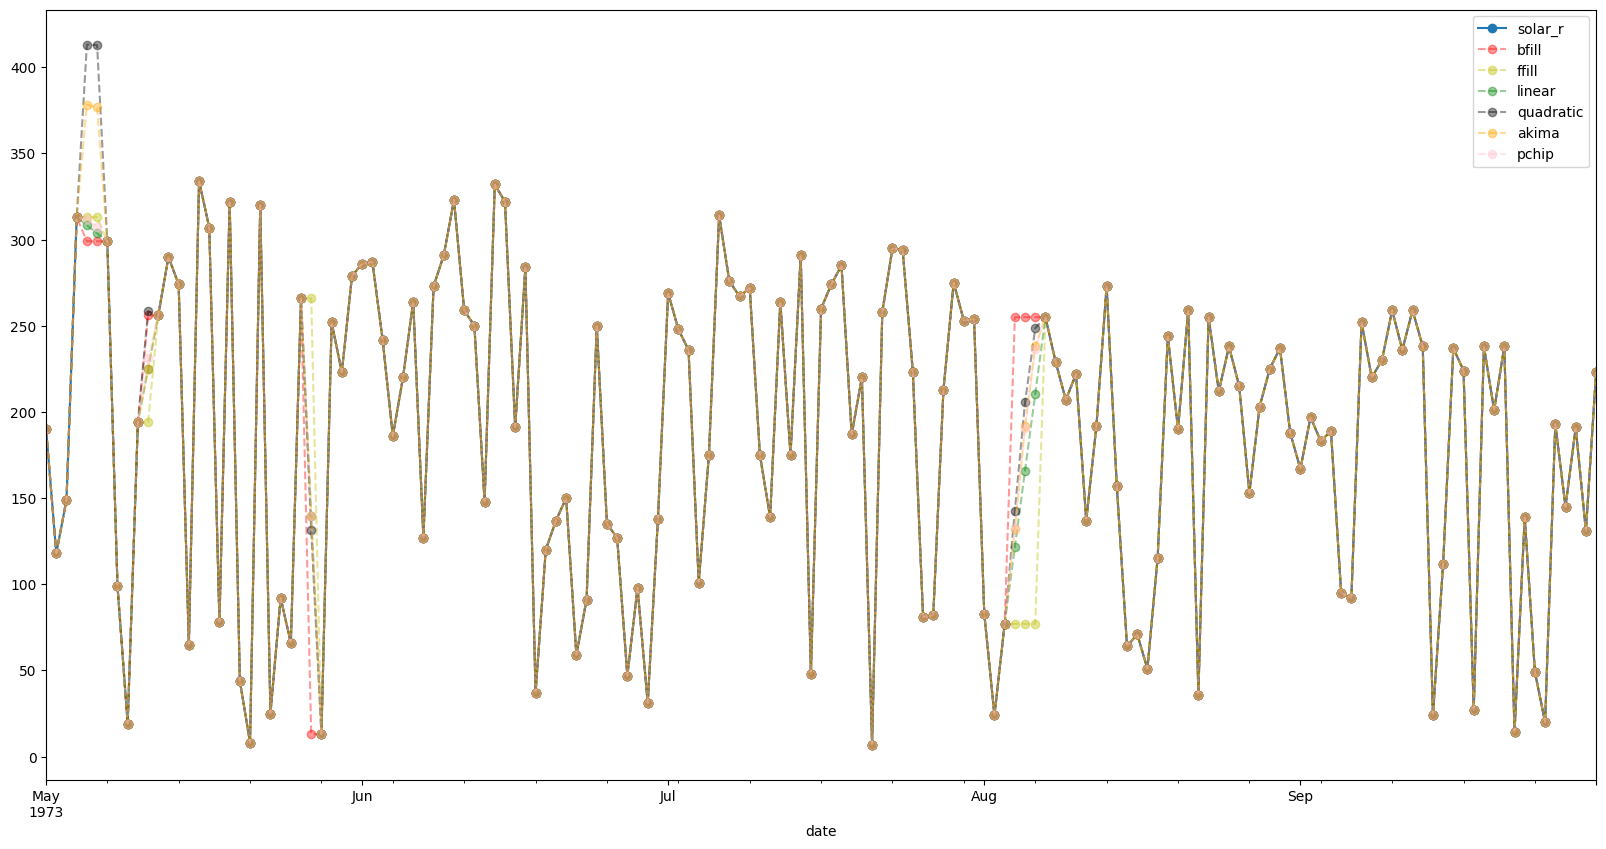

In [15]:
plt.figure(figsize=(20,10))
airquality_df.solar_r.plot(marker = "o")
airquality_df.solar_r.bfill().plot(color="r", alpha=0.4, ls="dashed", marker = "o")
airquality_df.solar_r.ffill().plot(color="y", alpha=0.4, ls="dashed", marker = "o")
airquality_df.solar_r.interpolate(method='linear').plot(color="g", alpha=0.4, ls="dashed", marker = "o")
airquality_df.solar_r.interpolate(method='quadratic').plot(color="k", alpha=0.4, ls="dashed", marker = "o")
airquality_df.solar_r.interpolate(method='akima').plot(color="orange", alpha=0.4, ls="dashed", marker = "o")
airquality_df.solar_r.interpolate(method='pchip').plot(color="pink", alpha=0.4, ls="dashed", marker = "o")
plt.legend(["solar_r","bfill","ffill","linear","quadratic","akima","pchip"])
plt.show()

In [16]:
airquality_df.solar_r = airquality_df.solar_r.interpolate(method='pchip')
airquality_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 153 entries, 1973-05-01 to 1973-09-30
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ozone    153 non-null    float64
 1   solar_r  153 non-null    float64
 2   wind     153 non-null    float64
 3   temp     153 non-null    int64  
 4   month    153 non-null    int64  
 5   day      153 non-null    int64  
 6   year     153 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 9.6 KB


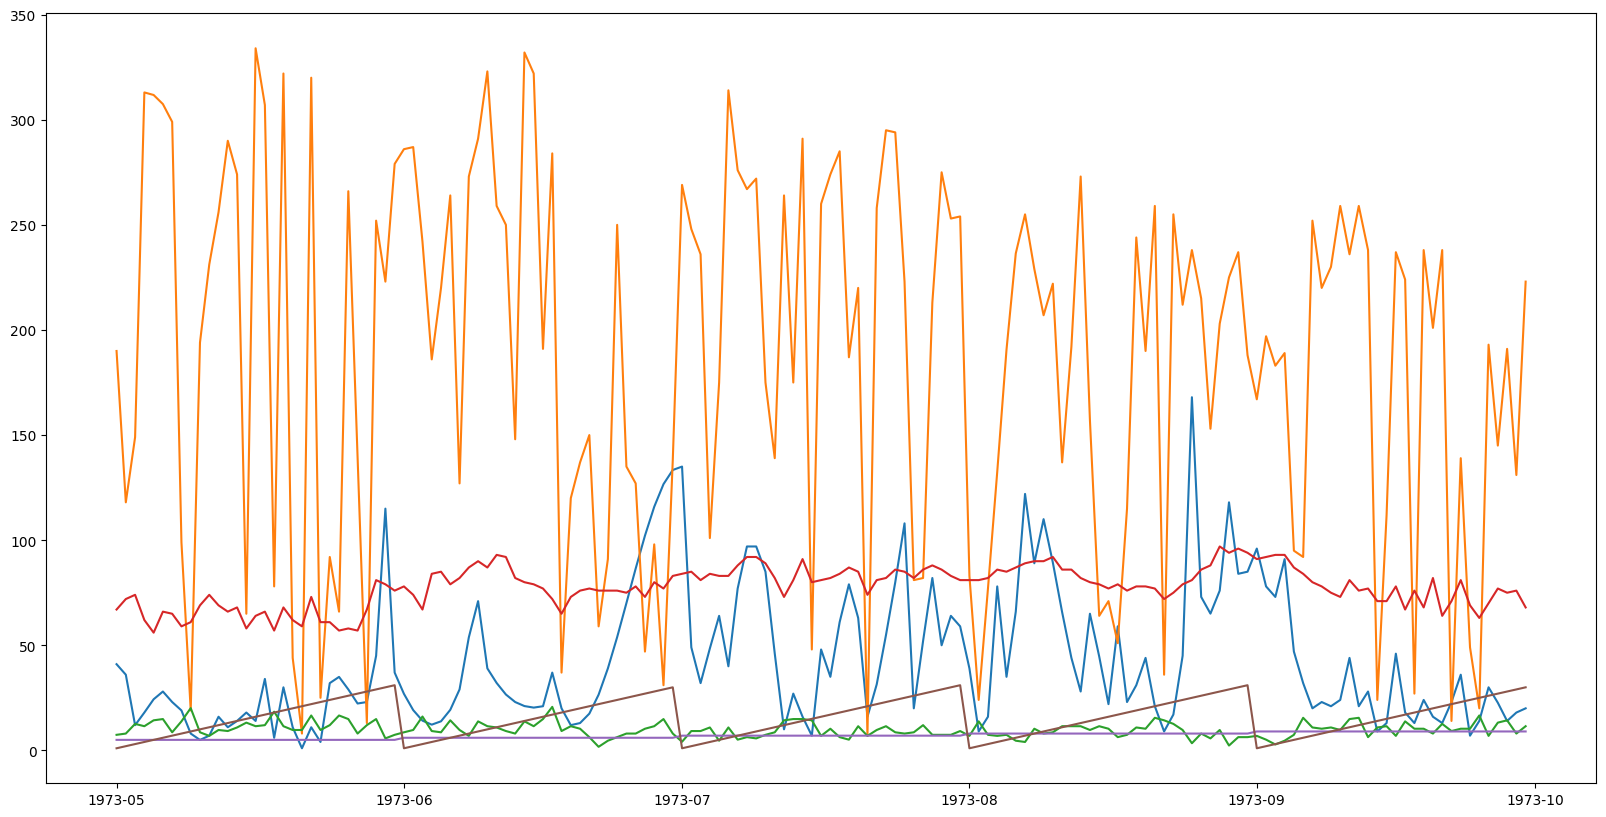

In [17]:
plt.figure(figsize=(20,10))
plt.plot(airquality_df.drop('year', axis=1))
plt.show()

# Imputación para estructuras de datos

In [18]:
nhanes_raw_df = nhanes.load.load_NHANES_data(year='2017-2018').clean_names(case_type="snake")
nhanes_raw_df.head()

,general_health_condition,ever_breastfed_or_fed_breastmilk,age_stopped_breastfeedingdays,age_first_fed_formuladays,age_stopped_receiving_formuladays,age_started_other_foodbeverage,age_first_fed_milkdays,type_of_milk_first_fed_whole_milk,type_of_milk_first_fed2_milk,type_of_milk_first_fed1_milk,...,days_smoked_cigs_during_past30_days,avg_cigarettesday_during_past30_days,tried_to_quit_smoking,times_stopped_smoking_cigarettes,how_long_were_you_able_to_stop_smoking,unit_of_measure_dayweekmonthyear_2_smq,current_selfreported_height_inches,current_selfreported_weight_pounds,tried_to_lose_weight_in_past_year,times_lost10_lbs_or_more_to_lose_weight
SEQN,,,,,,,,,,,,,,,,,,,,,
93703.0,NaN,1.0,273.0,1.0,365.0,152.0,365.0,Whole or regular milk,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93704.0,NaN,1.0,60.0,3.0,365.0,126.0,365.0,Whole or regular milk,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93705.0,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,63.0,165.0,0.0,11 times or more
93706.0,Very good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,68.0,145.0,0.0,Never
93707.0,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
nhanes_raw_df.shape

(8366, 197)

In [20]:
nhanes_selected = nhanes_raw_df.select_columns
nhanes_selected

<pandas_flavor.register.register_dataframe_method.<locals>.inner.<locals>.AccessorMethod at 0x7f6de13f28d0>

In [21]:
nhanes_selected = nhanes_raw_df.select_columns('general_health_condition', 'age_in_years_at_screening', 'gender', 'current_selfreported_height_inches',
                                               'current_selfreported_weight_pounds', 'doctor_told_you_have_diabetes', '60_sec_pulse30_sec_pulse2',
                                               'total_cholesterol_mgdl').rename_columns({
                                                 'age_in_years_at_screening': "age", 'current_selfreported_height_inches':'height',
                                                 'current_selfreported_weight_pounds':'weight','doctor_told_you_have_diabetes':'diabetes',
                                                 '60_sec_pulse30_sec_pulse2':'pulse','total_cholesterol_mgdl':'cholesterol'})
nhanes_selected.head()

,general_health_condition,age,gender,height,weight,diabetes,pulse,cholesterol
SEQN,,,,,,,,
93703.0,NaN,2.0,Female,NaN,NaN,0,NaN,NaN
93704.0,NaN,2.0,Male,NaN,NaN,0,NaN,NaN
93705.0,Good,66.0,Female,63.0,165.0,0,52.0,157.0
93706.0,Very good,18.0,Male,68.0,145.0,0,82.0,148.0
93707.0,Good,13.0,Male,NaN,NaN,0,100.0,189.0


In [22]:
nhanes_selected.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8366 entries, 93703.0 to 102956.0
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   general_health_condition  5964 non-null   object 
 1   age                       8366 non-null   float64
 2   gender                    8366 non-null   object 
 3   height                    5776 non-null   float64
 4   weight                    5828 non-null   float64
 5   diabetes                  8362 non-null   object 
 6   pulse                     6742 non-null   float64
 7   cholesterol               6738 non-null   float64
dtypes: float64(5), object(3)
memory usage: 588.2+ KB


# Comportamiento estadistico de las variables
## Medidas de tendencia central
## Medidas de posición
## Medidas de dispersión

In [23]:
nhanes_selected.describe()
# Si nos fijamos, el peso tiene una desviación estandar alta, y si nos fijamos en la media, la desviación hace que tome valores negativos, es decir, datos nulos

,age,height,weight,pulse,cholesterol
count,8366.000000,5776.000000,5828.000000,6742.000000,6738.000000
mean,35.830026,272.224030,350.995710,73.749926,179.894627
std,24.905061,1414.518896,1280.908078,12.380546,40.602248
min,1.000000,49.000000,72.000000,34.000000,76.000000
25%,12.000000,63.000000,145.000000,66.000000,151.000000
50%,33.000000,66.000000,171.500000,72.000000,176.000000
75%,59.000000,70.000000,208.000000,82.000000,204.000000
max,80.000000,9999.000000,9999.000000,136.000000,446.000000


In [24]:
nhanes_selected.describe(include='object')

,general_health_condition,gender,diabetes
count,5964,8366,8362
unique,5,2,3
top,Good,Female,0
freq,2454,4272,7334


In [25]:
## Desenmascarar datos nulos
nhanes_selected = nhanes_selected.replace({'height':{9999:np.nan, 7777:np.nan},
                                           'weight':{9999:np.nan, 7777:np.nan}})
nhanes_selected.describe()

,age,height,weight,pulse,cholesterol
count,8366.000000,5656.000000,5724.000000,6742.000000,6738.000000
mean,35.830026,66.249646,178.805556,73.749926,179.894627
std,24.905061,4.154477,48.688953,12.380546,40.602248
min,1.000000,49.000000,72.000000,34.000000,76.000000
25%,12.000000,63.000000,145.000000,66.000000,151.000000
50%,33.000000,66.000000,170.000000,72.000000,176.000000
75%,59.000000,69.000000,205.000000,82.000000,204.000000
max,80.000000,82.000000,484.000000,136.000000,446.000000


['0' 'Borderline' '1' nan]


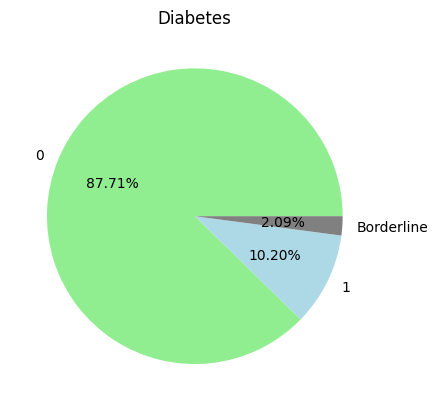

In [26]:
print(nhanes_selected.diabetes.unique())
plt.pie(nhanes_selected.diabetes.value_counts(), labels=nhanes_selected.diabetes.value_counts().index, autopct='%0.2f%%', colors=['lightgreen','lightblue', 'gray'])
plt.title('Diabetes')
plt.show()
# Borderline = no se si tiene diabetes o no, es practicamente nulo

In [27]:
nhanes_selected = nhanes_selected.replace({'diabetes':{'Borderline':np.nan}})
nhanes_selected.describe(include='object')

,general_health_condition,gender,diabetes
count,5964,8366,8187
unique,5,2,2
top,Good,Female,0
freq,2454,4272,7334


['0' nan '1']


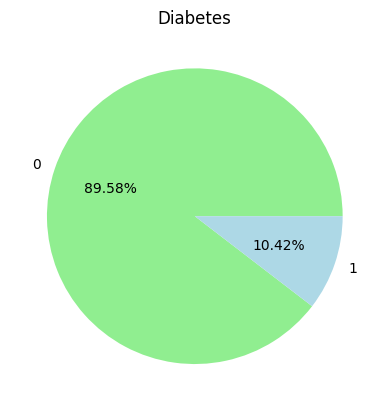

In [28]:
print(nhanes_selected.diabetes.unique())
plt.pie(nhanes_selected.diabetes.value_counts(), labels=nhanes_selected.diabetes.value_counts().index, autopct='%0.2f%%', colors=['lightgreen','lightblue', 'gray'])
plt.title('Diabetes')
plt.show()

# Tengo hambre

In [29]:
# dtype -> object, category (bool)
# dtype -> int64, int32, float64, float32

In [30]:
nhanes_selected.describe(include='all')

,general_health_condition,age,gender,height,weight,diabetes,pulse,cholesterol
count,5964,8366.000000,8366,5656.000000,5724.000000,8187,6742.000000,6738.000000
unique,5,NaN,2,NaN,NaN,2,NaN,NaN
top,Good,NaN,Female,NaN,NaN,0,NaN,NaN
freq,2454,NaN,4272,NaN,NaN,7334,NaN,NaN
mean,NaN,35.830026,NaN,66.249646,178.805556,NaN,73.749926,179.894627
std,NaN,24.905061,NaN,4.154477,48.688953,NaN,12.380546,40.602248
min,NaN,1.000000,NaN,49.000000,72.000000,NaN,34.000000,76.000000
25%,NaN,12.000000,NaN,63.000000,145.000000,NaN,66.000000,151.000000
50%,NaN,33.000000,NaN,66.000000,170.000000,NaN,72.000000,176.000000
75%,NaN,59.000000,NaN,69.000000,205.000000,NaN,82.000000,204.000000


Vamos a eliminar las variables nulas

In [31]:
nhanes_df = (nhanes_selected.missing.sort_variables_by_missingness().
             dropna(subset = ['diabetes'],how='any'). #Eliminar filas con valores nulos en la columna diabetes (any=todos los que tienen nulos, all= todos los valores nulos)
             transform_column('diabetes', 
                              function= lambda x: x.astype('int'),#Cambiar el tipo de dato de la columna diabetes a category
                              elementwise=False)) # elementwise=False -> aplica la función a toda la columna, es mas eficiente
nhanes_df

,height,weight,general_health_condition,cholesterol,pulse,diabetes,gender,age
SEQN,,,,,,,,
93703.0,NaN,NaN,NaN,NaN,NaN,0,Female,2.0
93704.0,NaN,NaN,NaN,NaN,NaN,0,Male,2.0
93705.0,63.0,165.0,Good,157.0,52.0,0,Female,66.0
93706.0,68.0,145.0,Very good,148.0,82.0,0,Male,18.0
93707.0,NaN,NaN,Good,189.0,100.0,0,Male,13.0
...,...,...,...,...,...,...,...,...
102951.0,NaN,NaN,NaN,NaN,NaN,0,Male,4.0
102953.0,65.0,218.0,Fair or,182.0,78.0,0,Male,42.0
102954.0,66.0,150.0,Good,172.0,78.0,0,Female,41.0


In [32]:
nhanes_df.describe(include='all')

,height,weight,general_health_condition,cholesterol,pulse,diabetes,gender,age
count,5488.000000,5553.000000,5797,6565.000000,6570.000000,8187.000000,8187,8187.000000
unique,NaN,NaN,5,NaN,NaN,NaN,2,NaN
top,NaN,NaN,Good,NaN,NaN,NaN,Female,NaN
freq,NaN,NaN,2383,NaN,NaN,NaN,4178,NaN
mean,66.256560,178.462993,NaN,179.673420,73.823135,0.104190,NaN,35.405032
std,4.157128,48.491693,NaN,40.544395,12.408720,0.305525,NaN,24.859200
min,49.000000,72.000000,NaN,76.000000,34.000000,0.000000,NaN,1.000000
25%,63.000000,145.000000,NaN,150.000000,66.000000,0.000000,NaN,12.000000
50%,66.000000,170.000000,NaN,175.000000,72.000000,0.000000,NaN,32.000000
75%,69.000000,205.000000,NaN,204.000000,82.000000,0.000000,NaN,58.000000


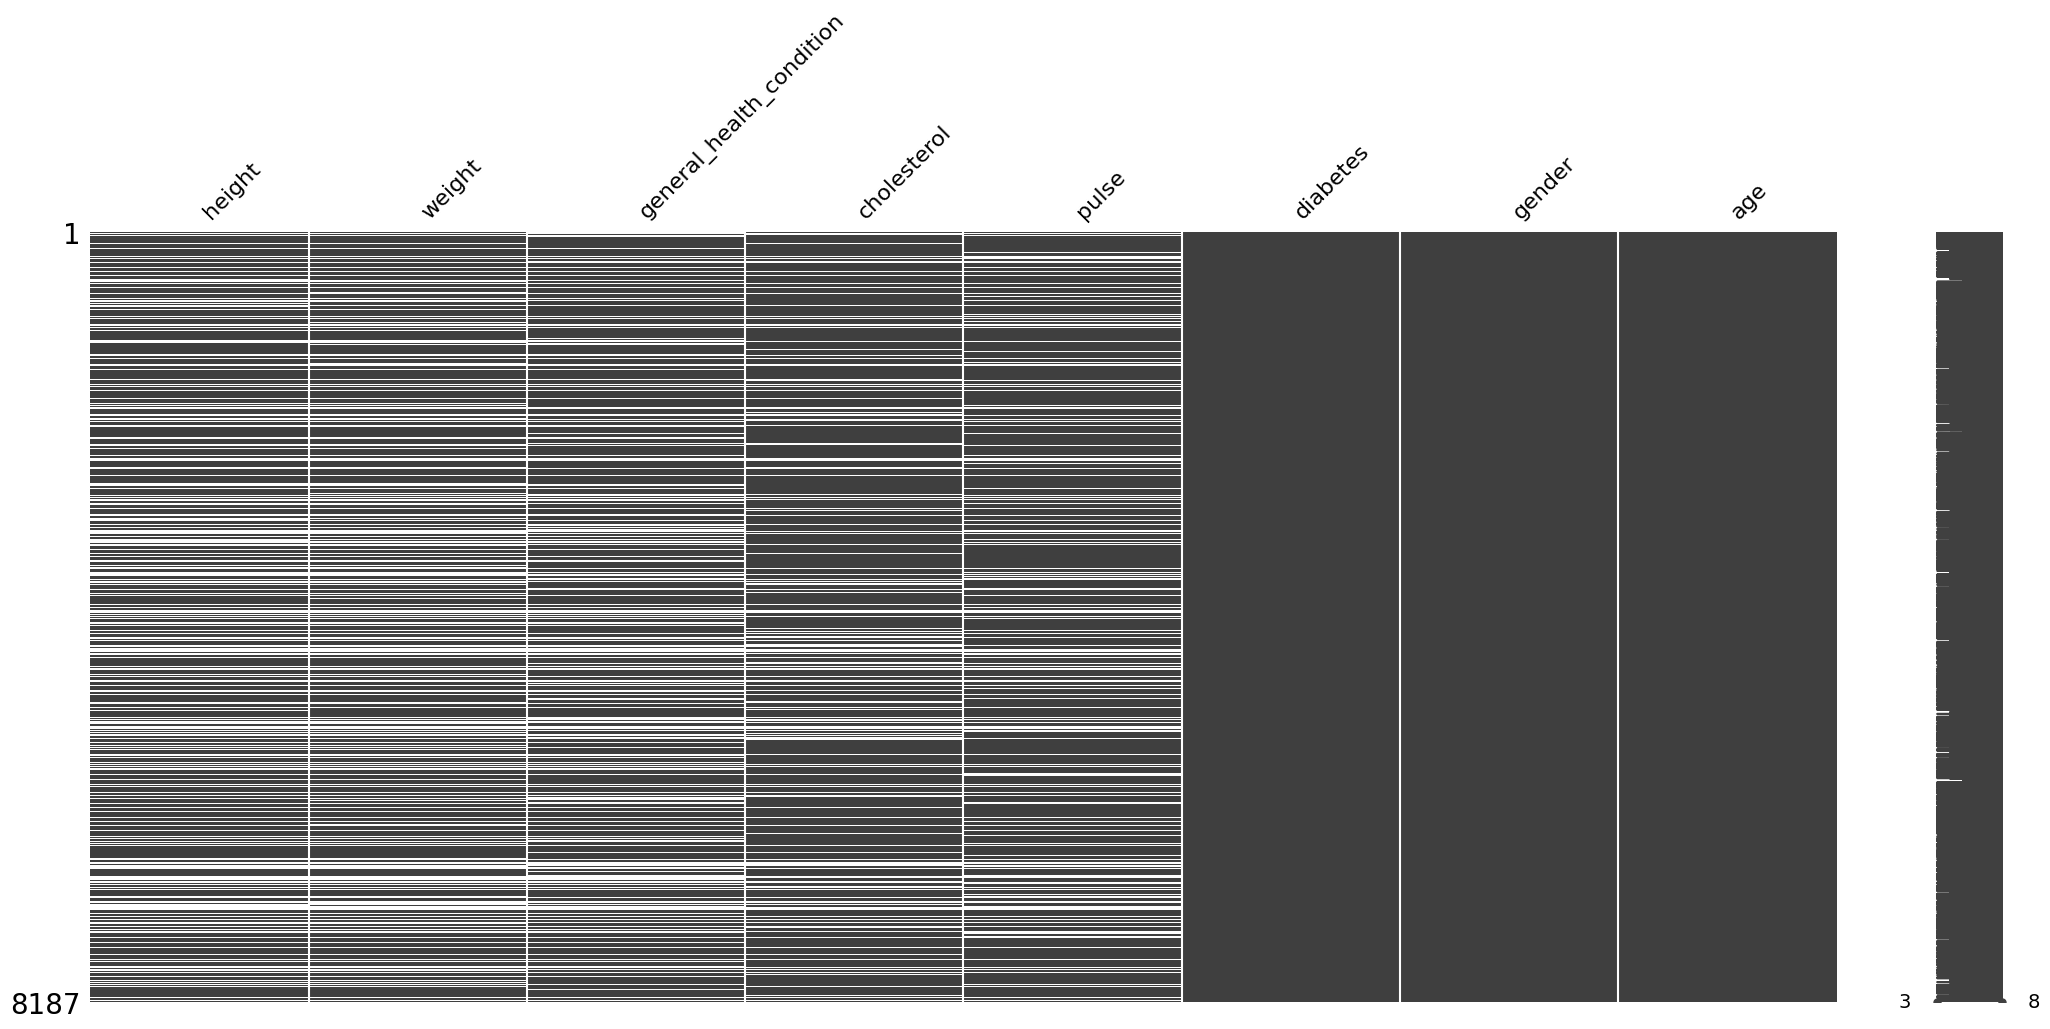

In [33]:
nhanes_df.pipe(missingno.matrix)
plt.show()

En este caso vamos a eliminar las variables nulas si y solo si todas las variables son nulas en los registros porque la altura, peso

In [34]:
nhanes_df.dropna(subset=['pulse','cholesterol', 'general_health_condition','weight', 'height'], how='all', inplace=True)
nhanes_df
# Se elimino filas que tengan todas esos valores nulos porque no habia forma de imputarlos, completarlos de alguna manera, etc

,height,weight,general_health_condition,cholesterol,pulse,diabetes,gender,age
SEQN,,,,,,,,
93705.0,63.0,165.0,Good,157.0,52.0,0,Female,66.0
93706.0,68.0,145.0,Very good,148.0,82.0,0,Male,18.0
93707.0,NaN,NaN,Good,189.0,100.0,0,Male,13.0
93709.0,62.0,200.0,NaN,176.0,74.0,0,Female,75.0
93711.0,69.0,142.0,Very good,238.0,62.0,0,Male,56.0
...,...,...,...,...,...,...,...,...
102949.0,72.0,180.0,Excellent,201.0,96.0,0,Male,33.0
102953.0,65.0,218.0,Fair or,182.0,78.0,0,Male,42.0
102954.0,66.0,150.0,Good,172.0,78.0,0,Female,41.0


Primero vamos a hacer imputación a la estatura por medidas de tendencia central

In [35]:
nhanes_df.transform_column('height', lambda x: x.fillna(x.mean().round()), elementwise=False)
# Estamos llenando cualquier nulo con el probmedio de la variable completa, este es un MCAR
# El element wise hace que solo se aplique a la columna que es

,height,weight,general_health_condition,cholesterol,pulse,diabetes,gender,age
SEQN,,,,,,,,
93705.0,63.0,165.0,Good,157.0,52.0,0,Female,66.0
93706.0,68.0,145.0,Very good,148.0,82.0,0,Male,18.0
93707.0,66.0,NaN,Good,189.0,100.0,0,Male,13.0
93709.0,62.0,200.0,NaN,176.0,74.0,0,Female,75.0
93711.0,69.0,142.0,Very good,238.0,62.0,0,Male,56.0
...,...,...,...,...,...,...,...,...
102949.0,72.0,180.0,Excellent,201.0,96.0,0,Male,33.0
102953.0,65.0,218.0,Fair or,182.0,78.0,0,Male,42.0
102954.0,66.0,150.0,Good,172.0,78.0,0,Female,41.0


Vamos a hacer una matriz de sombras para idetificar que individuos fueron imputados y entender que 

In [36]:
nhanes_df.select_columns('height', 'weight').missing.bind_shadow_matrix(True, False).assign(height = lambda df : df.height.fillna(value = df.height.mean().round()), weight = lambda df : df.weight.fillna(value = df.weight.mean().round() ))

,height,weight,height_NA,weight_NA
SEQN,,,,
93705.0,63.0,165.0,False,False
93706.0,68.0,145.0,False,False
93707.0,66.0,178.0,True,True
93709.0,62.0,200.0,False,False
93711.0,69.0,142.0,False,False
...,...,...,...,...
102949.0,72.0,180.0,False,False
102953.0,65.0,218.0,False,False
102954.0,66.0,150.0,False,False


<Axes: xlabel='height', ylabel='weight'>

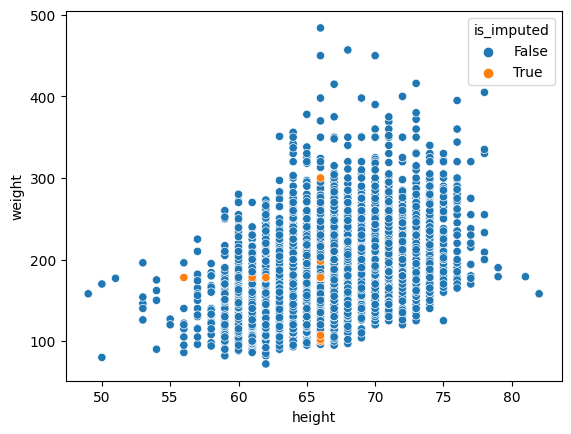

In [37]:
# Vamos a hacer un sccaterplot para hacer un grafico de relacion de estatura y peso
nhanes_df.select_columns('height', 'weight').missing.bind_shadow_matrix(True, False, suffix="_imp").assign(height = lambda df : df.height.fillna(value = df.height.mean().round()), weight = lambda df : df.weight.fillna(value = df.weight.mean().round() )).missing.scatter_imputation_plot(x='height', y='weight')

Transformación de variables categoricas para la imputación

In [38]:
categorical_columns = nhanes_df.select_dtypes(include=['object']).columns
categorical_transformer = sklearn.compose.make_column_transformer((sklearn.preprocessing.OrdinalEncoder(),categorical_columns), remainder='passthrough')
categorical_transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('ordinalencoder', OrdinalEncoder(),
                                 Index(['general_health_condition', 'gender'], dtype='object'))])

In [39]:
#Ejecutemos el transformador
nhanes_transformed_df = pd.DataFrame(categorical_transformer.fit_transform(nhanes_df), columns = categorical_transformer.get_feature_names_out(),
                                     index = nhanes_df.index).rename_columns(function = lambda x: x.removeprefix('ordinalencoder__'))\
                                       .rename_columns(function = lambda x: x.removeprefix('remainder__'))
                                      
nhanes_transformed_df
# Se crea un nuevo dataframe con las columnas transformadas, se transforman las columnas categoricas, a toda variable categorica se le asigna un valor numerico

,general_health_condition,gender,height,weight,cholesterol,pulse,diabetes,age
SEQN,,,,,,,,
93705.0,2.0,0.0,63.0,165.0,157.0,52.0,0.0,66.0
93706.0,4.0,1.0,68.0,145.0,148.0,82.0,0.0,18.0
93707.0,2.0,1.0,NaN,NaN,189.0,100.0,0.0,13.0
93709.0,NaN,0.0,62.0,200.0,176.0,74.0,0.0,75.0
93711.0,4.0,1.0,69.0,142.0,238.0,62.0,0.0,56.0
...,...,...,...,...,...,...,...,...
102949.0,0.0,1.0,72.0,180.0,201.0,96.0,0.0,33.0
102953.0,1.0,1.0,65.0,218.0,182.0,78.0,0.0,42.0
102954.0,2.0,0.0,66.0,150.0,172.0,78.0,0.0,41.0


Imputación por K-Nearst Neighbors

In [40]:
knn_imputer = sklearn.impute.KNNImputer() # 3 vecinos por defecto, se sugiere que sea impar
nhanes_knn_df = pd.DataFrame(knn_imputer.fit_transform(nhanes_transformed_df).round(), columns = nhanes_transformed_df.columns, index = nhanes_transformed_df.index)
nhanes_knn_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7157 entries, 93705.0 to 102956.0
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   general_health_condition  7157 non-null   float64
 1   gender                    7157 non-null   float64
 2   height                    7157 non-null   float64
 3   weight                    7157 non-null   float64
 4   cholesterol               7157 non-null   float64
 5   pulse                     7157 non-null   float64
 6   diabetes                  7157 non-null   float64
 7   age                       7157 non-null   float64
dtypes: float64(8)
memory usage: 503.2 KB


In [41]:
knn_imputer_shadow_matrix = pd.concat([nhanes_knn_df, nhanes_df.missing.create_shadow_matrix(True,False, suffix='_imp', only_missing=True)],axis=1)
knn_imputer_shadow_matrix

,general_health_condition,gender,height,weight,cholesterol,pulse,diabetes,age,height_imp,weight_imp,general_health_condition_imp,cholesterol_imp,pulse_imp
SEQN,,,,,,,,,,,,,
93705.0,2.0,0.0,63.0,165.0,157.0,52.0,0.0,66.0,False,False,False,False,False
93706.0,4.0,1.0,68.0,145.0,148.0,82.0,0.0,18.0,False,False,False,False,False
93707.0,2.0,1.0,69.0,130.0,189.0,100.0,0.0,13.0,True,True,False,False,False
93709.0,2.0,0.0,62.0,200.0,176.0,74.0,0.0,75.0,False,False,True,False,False
93711.0,4.0,1.0,69.0,142.0,238.0,62.0,0.0,56.0,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
102949.0,0.0,1.0,72.0,180.0,201.0,96.0,0.0,33.0,False,False,False,False,False
102953.0,1.0,1.0,65.0,218.0,182.0,78.0,0.0,42.0,False,False,False,False,False
102954.0,2.0,0.0,66.0,150.0,172.0,78.0,0.0,41.0,False,False,False,False,False


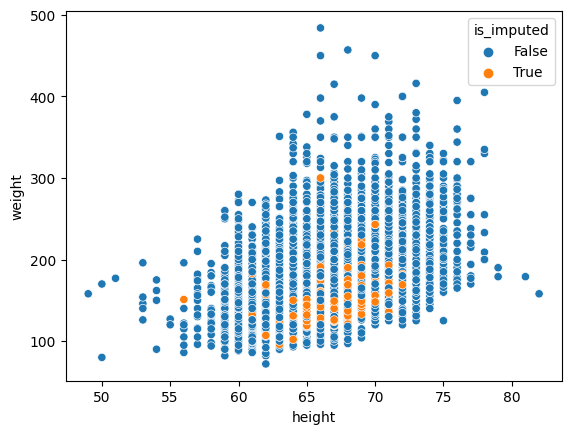

In [42]:
knn_imputer_shadow_matrix.missing.scatter_imputation_plot(x='height', y='weight')
plt.show()

Imputación MICE (Multiple Imputation by Chained Equations)

Se trata de un ejercicio iterativo que busca en cada iteración mejorar la imputación del dato nulo. Es decir, usa imputacione sprevias para mejorar imputaciones futuras.

Usa por defecto el Bayesian Ridge Regression para la imputación, busca generar mejorar como una linea recta hace una mejora en la obtención.

Se puede mejorar el metodo MICE con el uso de otro tipo de regresiones.

Caracteristicas
1. Preserva las relaciones entre las variables de los datos nulos
2. Reduce el sesgo generado por otros metodos de imputación
3. Su flexibilidad permite imputar datos MAR y MNAR
4. Es un metodo exhaustivo, por lo que opera correctamente para altas cantidades de datos y altas cantidades de datos nulos.

Tiene en cuenta la desviación estandar y la covarianza de las variables para hacer la imputación.

Algoritmo
1. Requiere la cantidad de iteraciones, mecanismo de inicio y modelo base
2. Va a generar tantas copias como iteraciones de los datos crudos
3. Imputación inicial con la medida de tendencia central
4. Toma la variable que se quiere imputar, cuela sus datos nulos y mantiene los no nulos
5. Construye un modelo de datos para la columna a imputar por medio de los demás e imputa los valores fatantes
6. Ejecuta los pasos previos para las demás colimnas
G. Realiza todo el proceso haste que se cumplan las iteraciones

![https://media.tenor.com/wO2FvpLCx7gAAAAM/rats-fighting-rat.gif](https://media.tenor.com/wO2FvpLCx7gAAAAM/rats-fighting-rat.gif)

https://www.youtube.com/watch?v=zX-pacwVyvU

In [53]:
mice_imputer = sklearn.impute.IterativeImputer(estimator=RandomForestRegressor(), initial_strategy="mean", max_iter=10)
nhanes_mice_df = pd.DataFrame(mice_imputer.fit_transform(nhanes_transformed_df).round(), columns = nhanes_transformed_df.columns, index = nhanes_transformed_df.index)
nhanes_mice_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7157 entries, 93705.0 to 102956.0
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   general_health_condition  7157 non-null   float64
 1   gender                    7157 non-null   float64
 2   height                    7157 non-null   float64
 3   weight                    7157 non-null   float64
 4   cholesterol               7157 non-null   float64
 5   pulse                     7157 non-null   float64
 6   diabetes                  7157 non-null   float64
 7   age                       7157 non-null   float64
dtypes: float64(8)
memory usage: 503.2 KB


Los radom forest son metodos muy robustos para la imputación de datos.

In [54]:
# Shadow matrix
mice_imputer_shadow_matrix = pd.concat([nhanes_mice_df, nhanes_df.missing.create_shadow_matrix(True,False, suffix='_imp')],axis=1)
mice_imputer_shadow_matrix

,general_health_condition,gender,height,weight,cholesterol,pulse,diabetes,age,height_imp,weight_imp,general_health_condition_imp,cholesterol_imp,pulse_imp,diabetes_imp,gender_imp,age_imp
SEQN,,,,,,,,,,,,,,,,
93705.0,2.0,0.0,63.0,165.0,157.0,52.0,0.0,66.0,False,False,False,False,False,False,False,False
93706.0,4.0,1.0,68.0,145.0,148.0,82.0,0.0,18.0,False,False,False,False,False,False,False,False
93707.0,2.0,1.0,69.0,212.0,189.0,100.0,0.0,13.0,True,True,False,False,False,False,False,False
93709.0,3.0,0.0,62.0,200.0,176.0,74.0,0.0,75.0,False,False,True,False,False,False,False,False
93711.0,4.0,1.0,69.0,142.0,238.0,62.0,0.0,56.0,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102949.0,0.0,1.0,72.0,180.0,201.0,96.0,0.0,33.0,False,False,False,False,False,False,False,False
102953.0,1.0,1.0,65.0,218.0,182.0,78.0,0.0,42.0,False,False,False,False,False,False,False,False
102954.0,2.0,0.0,66.0,150.0,172.0,78.0,0.0,41.0,False,False,False,False,False,False,False,False


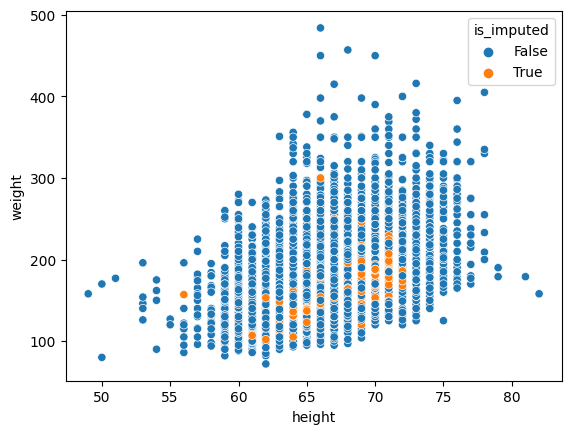

In [55]:
mice_imputer_shadow_matrix.missing.scatter_imputation_plot(x='height', y='weight')
plt.show()

In [56]:
nhanes_impputer_df = nhanes_mice_df
nhanes_impputer_df[categorical_columns] = (categorical_transformer.named_transformers_.ordinalencoder.inverse_transform(X = nhanes_mice_df[categorical_columns]))
nhanes_impputer_df

,general_health_condition,gender,height,weight,cholesterol,pulse,diabetes,age
SEQN,,,,,,,,
93705.0,Good,Female,63.0,165.0,157.0,52.0,0.0,66.0
93706.0,Very good,Male,68.0,145.0,148.0,82.0,0.0,18.0
93707.0,Good,Male,69.0,212.0,189.0,100.0,0.0,13.0
93709.0,Poor?,Female,62.0,200.0,176.0,74.0,0.0,75.0
93711.0,Very good,Male,69.0,142.0,238.0,62.0,0.0,56.0
...,...,...,...,...,...,...,...,...
102949.0,Excellent,Male,72.0,180.0,201.0,96.0,0.0,33.0
102953.0,Fair or,Male,65.0,218.0,182.0,78.0,0.0,42.0
102954.0,Good,Female,66.0,150.0,172.0,78.0,0.0,41.0
